In [20]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [21]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [14, 6]})

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
from scipy import stats
import datetime as dt
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [24]:
symbol = yf.download("TSLA", dt.datetime(2022, 10, 20), dt.datetime.now())
symbol

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100
2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75713800
2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
...,...,...,...,...,...,...
2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800


In [25]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [26]:
symbol['Adj Close'].iplot()

In [27]:
# Let's see how extreme these price changes can be.

d = symbol.pct_change()[1:] # Converting to get percentage changes.
d

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-21,-0.008930,-0.004129,0.008911,0.034543,0.034543,-0.357258
2022-10-24,-0.002907,-0.005404,-0.025564,-0.014876,-0.014876,0.326664
2022-10-25,0.020795,0.050820,0.057455,0.052876,0.052876,-0.039214
2022-10-26,0.044265,0.027858,0.039048,0.009981,0.009981,-0.119114
2022-10-27,0.047265,0.013920,0.021311,0.002003,0.002003,-0.274944
...,...,...,...,...,...,...
2023-10-16,-0.034183,-0.016179,-0.006954,0.011150,0.011150,-0.128893
2023-10-17,0.000200,0.006969,-0.005634,0.003663,0.003663,0.052247
2023-10-18,0.010396,-0.009915,-0.020236,-0.047754,-0.047754,0.337579


In [28]:
symbol = yf.download("TSLA", dt.datetime(2022, 10, 20), dt.datetime.now())
symbol

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100
2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75713800
2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
...,...,...,...,...,...,...
2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800


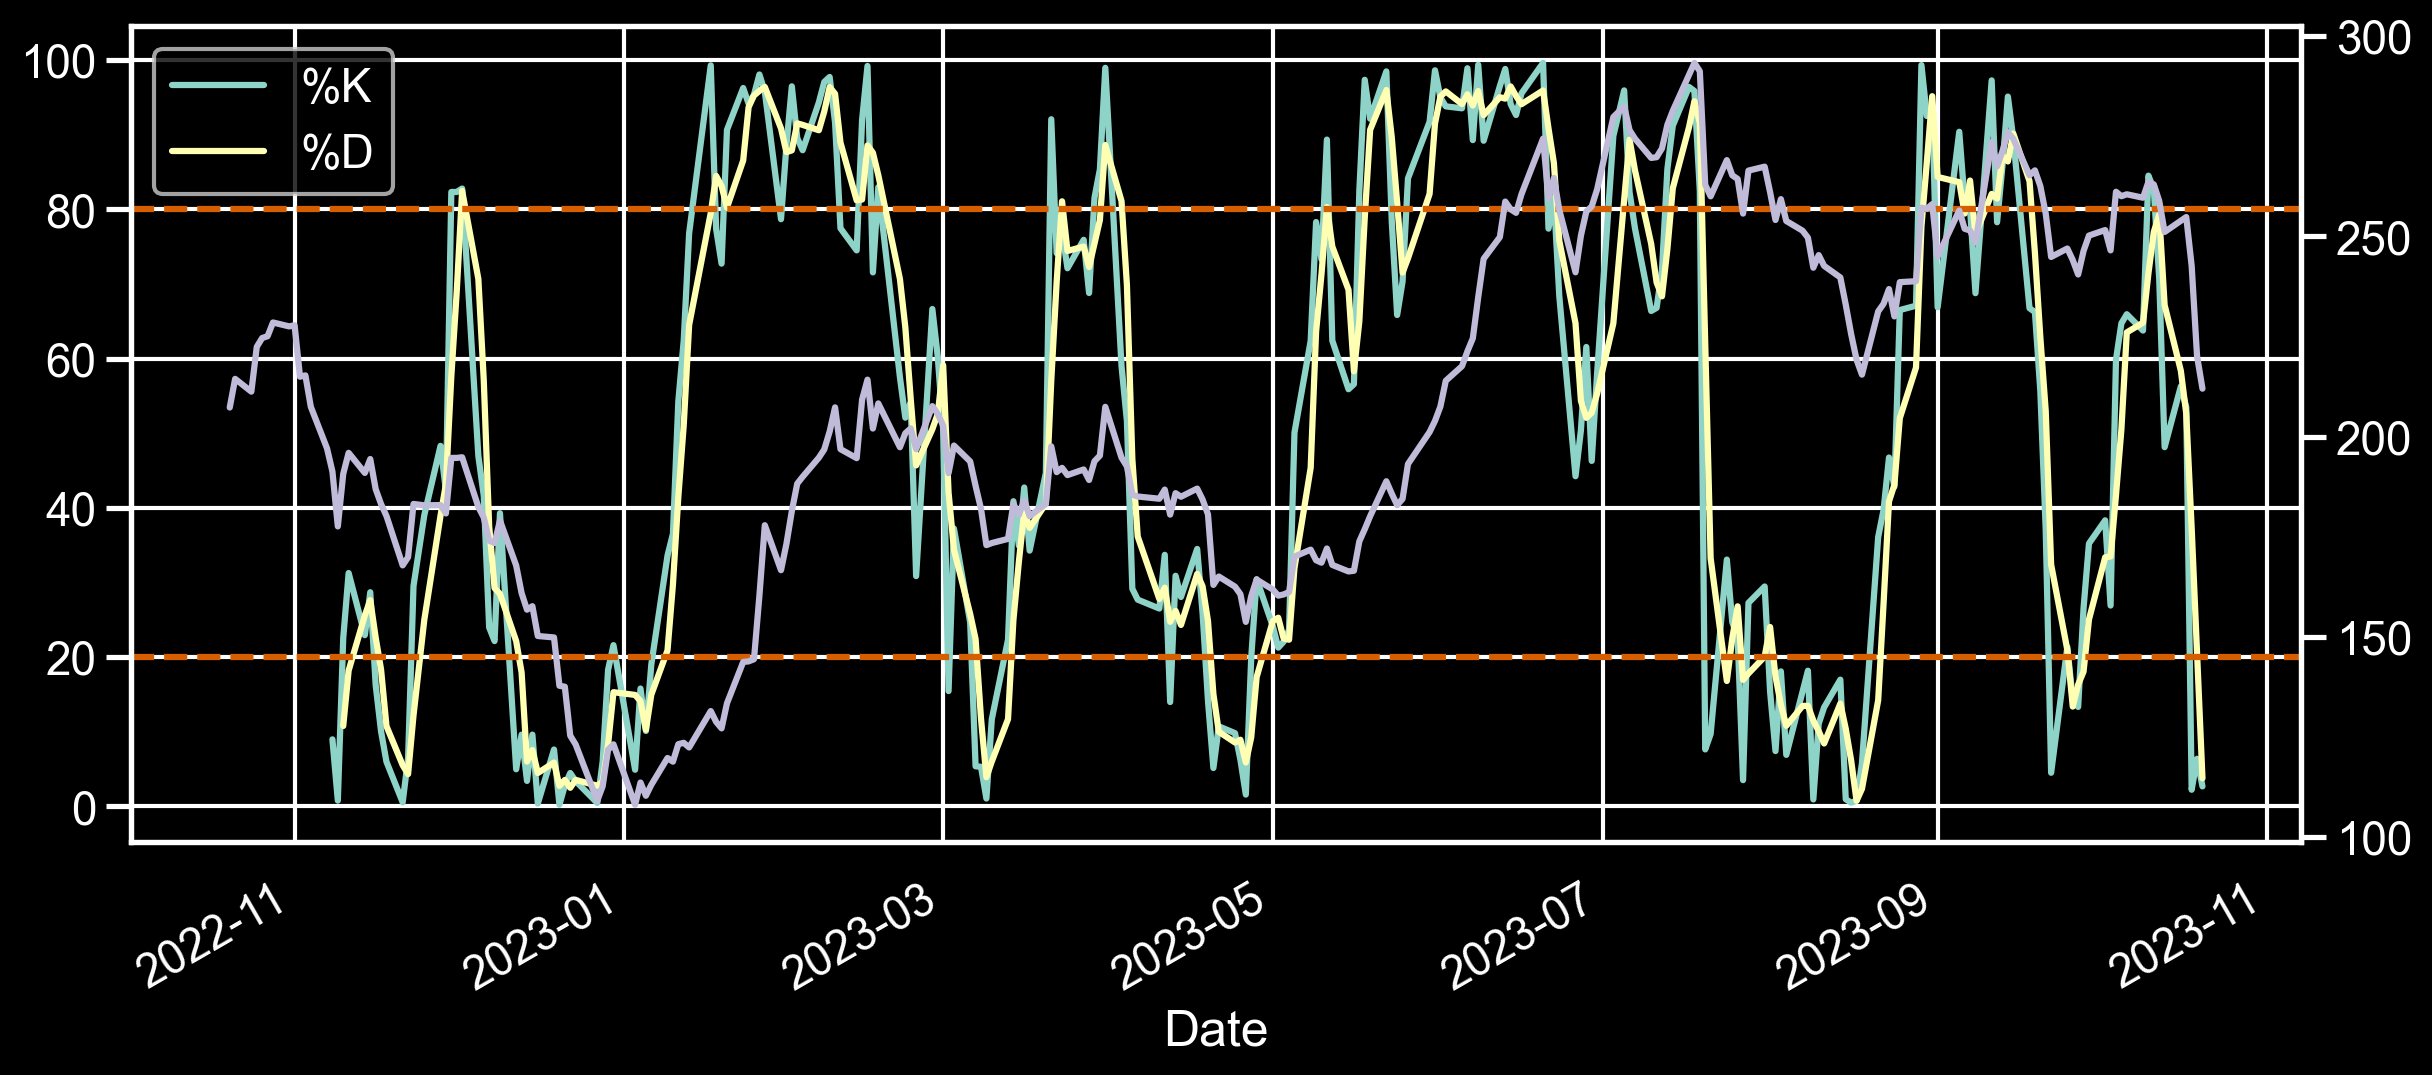

'Remember, that these signals are indicators not predictors. If we look at the graph, there are a ton of signals related to \nbuy and sell, so you have to have other factors to have a more reliable approach of when to buy and sell.'

In [29]:
# %D = Simple Moving Average of %K
symbol['14-high'] = symbol['High'].rolling(14).max()
symbol['14-low'] = symbol['Low'].rolling(14).min()
symbol['%K'] = (symbol['Close'] - symbol['14-low'])*100/(symbol['14-high'] - symbol['14-low'])
symbol['%D'] = symbol['%K'].rolling(3).mean()
ax = symbol[['%K', '%D']].plot()
symbol['Adj Close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

# if %K > %D, then that is a buy signal.
# if %K < %D, then that is a sell signal.

# Traditionally:
# Below 20 indicates that equity is oversold
# Above 80 indicates that equity is overbought

In [41]:
from stockstats import wrap

In [42]:
symbol = yf.download("TSLA", dt.datetime(2021, 10, 20), dt.datetime.now())
symbol

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-20,288.450012,289.829987,285.793335,288.600006,288.600006,42096300
2021-10-21,285.333344,300.000000,285.166656,298.000000,298.000000,94444500
2021-10-22,298.500000,303.333344,296.986664,303.226654,303.226654,68642400
2021-10-25,316.843323,348.339996,314.733337,341.619995,341.619995,188556300
2021-10-26,341.563324,364.980011,333.813324,339.476654,339.476654,187245000
...,...,...,...,...,...,...
2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800


In [43]:
type(symbol)

pandas.core.frame.DataFrame

In [44]:
TSLA = wrap(symbol) 
TSLA

,open,high,low,close,adj close,volume
Date,,,,,,
2021-10-20,288.450012,289.829987,285.793335,288.600006,288.600006,42096300
2021-10-21,285.333344,300.000000,285.166656,298.000000,298.000000,94444500
2021-10-22,298.500000,303.333344,296.986664,303.226654,303.226654,68642400
2021-10-25,316.843323,348.339996,314.733337,341.619995,341.619995,188556300
2021-10-26,341.563324,364.980011,333.813324,339.476654,339.476654,187245000
...,...,...,...,...,...,...
2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800


In [45]:
macd = TSLA['macd'] # Difference between the two exponential moving averages: MACD =  (26 period EMA - 12 period EMA)
macd

Date
2021-10-20    0.000000
2021-10-21    0.210897
2021-10-22    0.430803
2021-10-25    1.906440
2021-10-26    2.582855
                ...   
2023-10-16    0.915563
2023-10-17    0.724678
2023-10-18   -0.403963
2023-10-19   -3.084077
2023-10-20   -5.796484
Name: macd, Length: 504, dtype: float64

In [46]:
macds = TSLA['macds'] # signal line = EMA of 9 period of the MACD values
macds

Date
2021-10-20    0.000000
2021-10-21    0.117165
2021-10-22    0.245705
2021-10-25    0.808285
2021-10-26    1.336179
                ...   
2023-10-16    1.090359
2023-10-17    1.017223
2023-10-18    0.732986
2023-10-19   -0.030427
2023-10-20   -1.183638
Name: macds, Length: 504, dtype: float64

In [47]:
macdh = TSLA['macdh'] # histogram line = MACD - Signal Line
macdh

Date
2021-10-20    0.000000
2021-10-21    0.093732
2021-10-22    0.185098
2021-10-25    1.098155
2021-10-26    1.246676
                ...   
2023-10-16   -0.174796
2023-10-17   -0.292545
2023-10-18   -1.136948
2023-10-19   -3.053650
2023-10-20   -4.612845
Name: macdh, Length: 504, dtype: float64

In [48]:
def plot_macd(prices, macd, signal, hist):
    
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (6,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

Signals

if MACD line > Signal line (Buy the stock).

if MACD line < Signal line (Sell the stock).

Traders use the histogram as a gauge on whether the bullish or bearish momentum is high.

When there is no highlight histogram heights, that may be the moment to enter into the market because it may be the start of a trend.

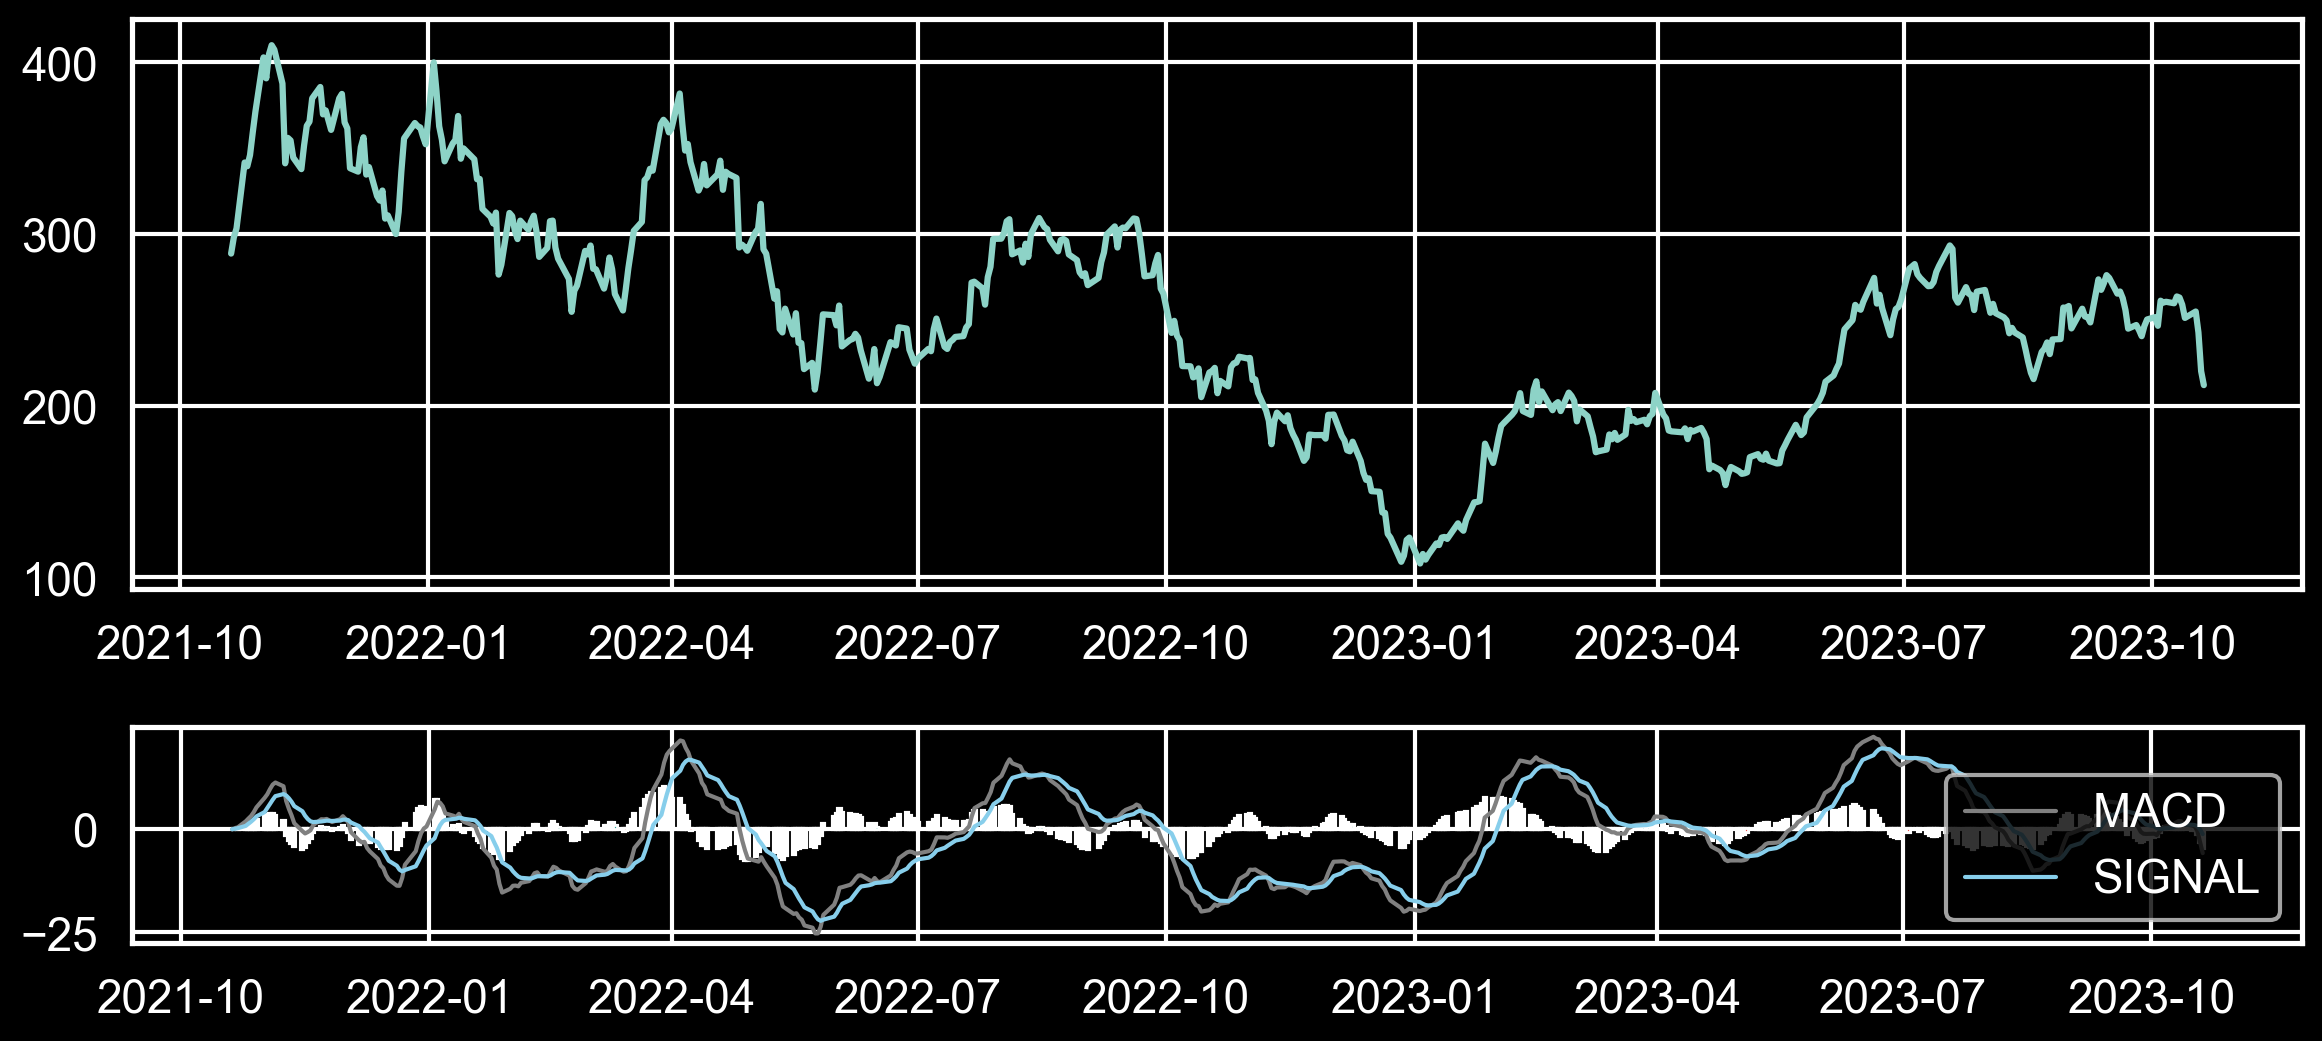

In [49]:
plot_macd(prices = symbol['adj close'], macd = macd, signal = macds, hist =  macdh)